In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop unnecessary columns
# columns to drop
drop_columns = ['Cabin','PassengerId','Name','Ticket','Fare']

# dropping colums
titanic_df.drop(drop_columns, axis = 1, inplace = True)


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,S,0,1
1,1,1,38.0,1,0,C,1,0
2,1,3,26.0,0,0,S,1,0
3,1,1,35.0,1,0,S,1,0
4,0,3,35.0,0,0,S,0,1


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


It looks the Age columns has missing data so I am just going to check the whole dataframe for missing data and fix it.

In [8]:
# getting the number of missing data points per column
missing_data = titanic_df.isnull().sum()

# number of missing points in the columns
missing_data = missing_data[missing_data != 0]

missing_data

Age    177
dtype: int64

As it can be seen, 20% of the Age data is missing and deleting all these rows of data would be a big lose of data. Therefore, to fix it, replacing the missing values with the average of the age column is the best solution.

In [9]:
# Get the mean of the Age values
age_mean = round(titanic_df['Age'].mean(),0)

# Replace the missing values with the mean
titanic_df['Age'].fillna(age_mean, inplace = True)

# Selecting Variables

Getting independent and dependent variables.

In [10]:
X = titanic_df.iloc[:,1:].values

y = titanic_df.iloc[:,0]


# Training, Development and Test Data

In [15]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.2)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)

print(X_train.shape, X_dev.shape, X_test.shape)
print(y_train.shape, y_dev.shape, y_test.shape)


(569, 9) (143, 9) (179, 9)
(569,) (143,) (179,)


# Model

# Unpruned Tree

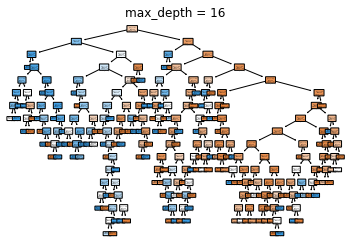

In [17]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None)
unpruned.fit(X_train, y_train)

# displaying the unpruned tree
fig = plt.figure()
plt.title(f'max_depth = {unpruned.tree_.max_depth}')
tree.plot_tree(unpruned,rounded = True, proportion = False, precision = 1, filled = True,) #display tree
fig.savefig('unpruned.png')
plt.title(f'max_depth = {unpruned.tree_.max_depth}')
plt.show()

In [18]:
# Computing the model's accuracy on the development set
print("Performance without pruning:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7552447552447552
At depth: 16


# Pruned Tree

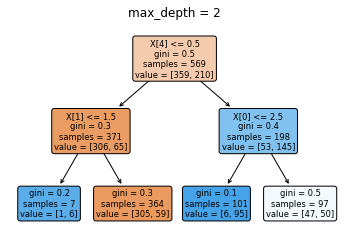

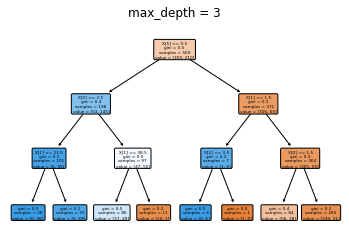

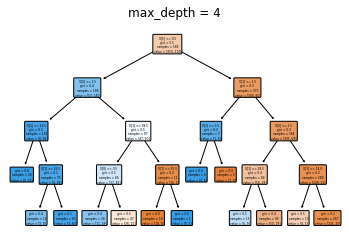

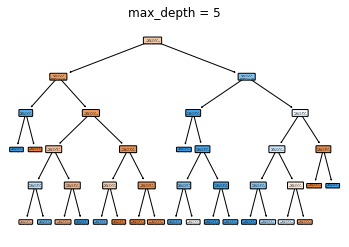

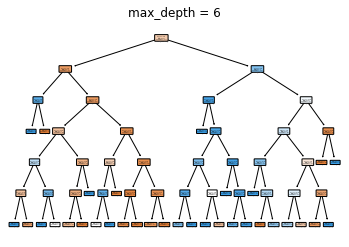

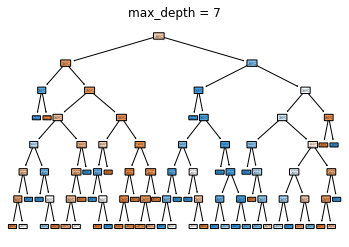

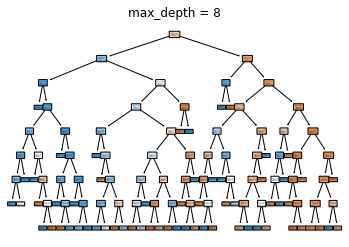

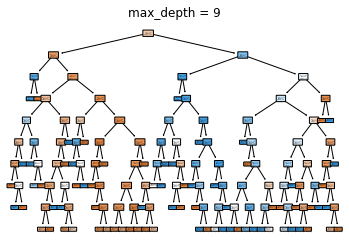

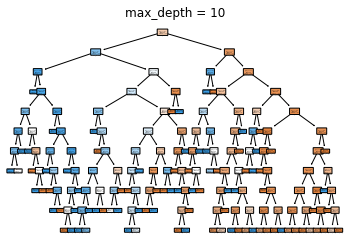

In [19]:
# function to plot tree at different max_depth and return accuracies
def tree_plot(max_depth):
    
    # Decision tree model at max_depth
    model = DecisionTreeClassifier(max_depth = max_depth)
    
    # fitting training data
    model.fit(X_train, y_train) 
    
    # getting accuracies of both the training and development sets.
    score_train = model.score(X_train, y_train)
    score_dev = model.score(X_dev, y_dev)
    
    # plot of tree at each max_depth level
    fig = plt.figure()
    tree.plot_tree(model,rounded = True, proportion = False, precision = 1, filled = True,) #display tree
    name = f'pruned_{depth}.png'
    fig.savefig(name)
    plt.title(f'max_depth = {max_depth}')
    
    # return training and development accuracies at max_depth
    return [score_train,score_dev]

# define the range od the max_depth   
pruned_depths = range(2,11)

# lists to store the accuracies
pruned_scores_train = []
pruned_scores_dev = [] 

# plotting trees and store accuracies at different depths
for depth in pruned_depths:
    
    # plotting and returning accuracies
    scores = tree_plot(depth)
    pruned_scores_train.append(scores[0])
    pruned_scores_dev.append(scores[1])

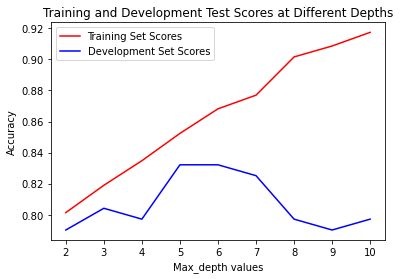

In [22]:
# Plotting lines of the training and development accuracies
scores_legend = ['Training Set Scores','Development Set Scores']

# plotting the accuracies on the same set of axis
plt.plot(pruned_depths,pruned_scores_train,'r',pruned_depths,pruned_scores_dev,'b')

plt.legend(scores_legend) # legend

# labels of the plot
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title('Training and Development Test Scores at Different Depths')

plt.xticks(ticks = pruned_depths) # setting xticks to depth values

plt.show() # showing plot

The training set score shows a growing straight line which means that the accuracy of the tarining set increases the deeper the tree gets. 

The development score line shows a partial increase in the accuracy of the development set up to a depth of 5, and then the accuracy starts declininf from a depth of 6 until 10. 

This plot shows an overfitting problem.

In [25]:
# getting maximum best depth
best_depth = pruned_depths[np.argmax(pruned_scores_dev)]
print('Best performance reached at depth of:', best_depth)

# training the final decision tree model
pruned = DecisionTreeClassifier(max_depth = best_depth)
pruned.fit(X_train, y_train)

print(f"Performance accuracy :", pruned.score(X_test, y_test))

Best performance reached at depth of: 5
Performance accuracy : 0.8100558659217877
